In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [73]:
filepath='MPC95.csv'
df=pd.read_csv(filepath)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2024 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2024 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [74]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2024 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2024 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [75]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,09-05-2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [77]:
df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [78]:
df.nunique()

Airline              12
Date_of_Journey      40
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [79]:
columns = df.columns

unique_counts = [df[col].value_counts() for col in columns]


result_df = pd.DataFrame({"Unique Elements": columns, "Counts": unique_counts})

print(result_df.to_string())

    Unique Elements                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Counts
0           Airline                                                                                                                                                                                                      

In [80]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [81]:
df1=df.dropna()

In [82]:
def convert2min(duration):
    h=m=0
    for i in duration.split():
        if 'h' in i:
            h=int(i.replace('h',''))
        elif 'm' in i:
            m=int(i.replace('m',''))
    total=(float(h*60+m))
    return (total)

df1.loc[:,'DurationinMin'] = df1['Duration'].apply(convert2min)


def stopinNumeric(total_stops):
    a={"1 stop":1,"non-stop":0,"2 stops":2,"3 stops":3,"4 stops":1}
    result=(a[total_stops])
    return result

df1.loc[:, 'TotalStopNumeric'] = df1['Total_Stops'].apply(stopinNumeric)

df1.head()
            

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DurationinMin,TotalStopNumeric
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2024 01:10,2h 50m,non-stop,No info,3897,170.0,0
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445.0,2
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2024 04:25,19h,2 stops,No info,13882,1140.0,2
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325.0,1
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285.0,1


In [83]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10682 non-null  object 
 1   Date_of_Journey   10682 non-null  object 
 2   Source            10682 non-null  object 
 3   Destination       10682 non-null  object 
 4   Route             10682 non-null  object 
 5   Dep_Time          10682 non-null  object 
 6   Arrival_Time      10682 non-null  object 
 7   Duration          10682 non-null  object 
 8   Total_Stops       10682 non-null  object 
 9   Additional_Info   10682 non-null  object 
 10  Price             10682 non-null  int64  
 11  DurationinMin     10682 non-null  float64
 12  TotalStopNumeric  10682 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.1+ MB


In [84]:
df1.isnull().sum()

Airline             0
Date_of_Journey     0
Source              0
Destination         0
Route               0
Dep_Time            0
Arrival_Time        0
Duration            0
Total_Stops         0
Additional_Info     0
Price               0
DurationinMin       0
TotalStopNumeric    0
dtype: int64

In [85]:
from datetime import datetime, timedelta
df2=df1.drop(columns=['Total_Stops','Duration'])
df2['Dep_Day']=df2['Date_of_Journey'].str.split('-').str[0].astype(int)
df2['Dep_Month']=df2['Date_of_Journey'].str.split('-').str[1].astype(int)
df2['Dep_Hour']=pd.to_datetime(df2['Dep_Time']).dt.hour
df2['Dep_min']=pd.to_datetime(df2['Dep_Time']).dt.minute

def extract_components(row):
    journey_date = row['Date_of_Journey']
    arrival_time = row['Arrival_Time']

    # Check if the arrival time includes a date
    if ' ' in arrival_time:
        arrival_datetime = datetime.strptime(arrival_time, '%d-%m-%Y %H:%M')
    else:
        arrival_datetime = datetime.strptime(f"{journey_date} {arrival_time}", '%d-%m-%Y %H:%M')
        # Check if time is on the next day
        if arrival_datetime.time() < datetime.strptime('12:00', '%H:%M').time():  # You can adjust this threshold
            arrival_datetime += timedelta(days=1)
    
    return pd.Series([arrival_datetime.day, arrival_datetime.month, arrival_datetime.hour, arrival_datetime.minute])

df2[['Arr_Day', 'Arr_Month', 'Arr_Hour', 'Arr_minute']] = df2.apply(extract_components, axis=1)



df2.drop(['Dep_Time','Date_of_Journey','Arrival_Time'],axis=1,inplace=True)
df2

,Airline,Source,Destination,Route,Additional_Info,Price,DurationinMin,TotalStopNumeric,Dep_Day,Dep_Month,Dep_Hour,Dep_min,Arr_Day,Arr_Month,Arr_Hour,Arr_minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,No info,3897,170.0,0,24,3,22,20,22,3,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,No info,7662,445.0,2,1,5,5,50,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,No info,13882,1140.0,2,9,6,9,25,10,6,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,No info,6218,325.0,1,12,5,18,5,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,No info,13302,285.0,1,1,3,16,50,1,3,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,No info,4107,150.0,0,9,4,19,55,9,4,22,25
10679,Air India,Kolkata,Banglore,CCU ? BLR,No info,4145,155.0,0,27,4,20,45,27,4,23,20
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,No info,7229,180.0,0,27,4,8,20,28,4,11,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,No info,12648,160.0,0,1,3,11,30,1,3,14,10


In [86]:
df2['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

# Univariate analysis

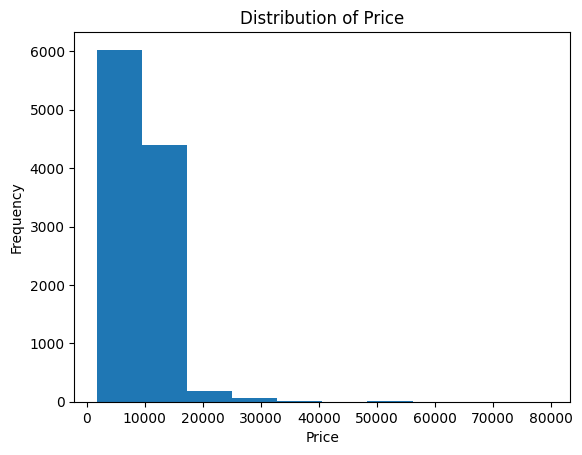

In [87]:
df2['Price'].hist(grid=False)
plt.xlabel('Price')
plt.ylabel("Frequency")
plt.title("Distribution of Price")
plt.show()



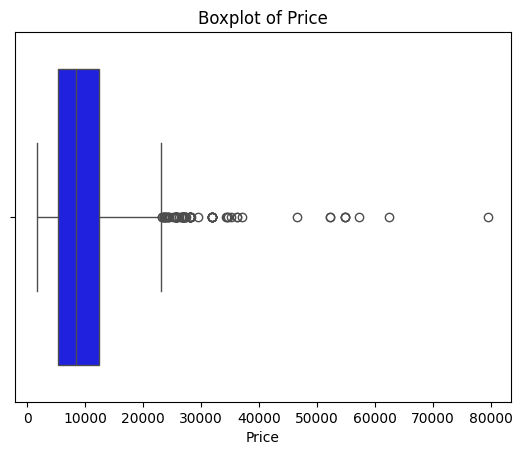

In [88]:

sns.boxplot(x=df['Price'],color='blue')
plt.title("Boxplot of Price")
plt.xlabel('Price')
plt.show()

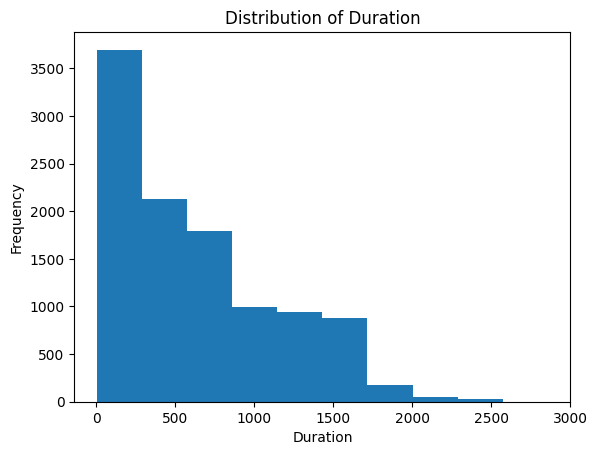

In [89]:
df2['DurationinMin'].hist(grid=False)
plt.xlabel('Duration')
plt.ylabel("Frequency")
plt.title("Distribution of Duration")
plt.show()

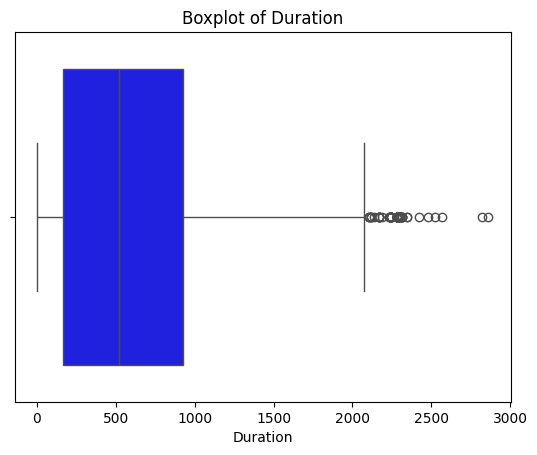

In [90]:
sns.boxplot(x=df2['DurationinMin'],color='blue')
plt.title("Boxplot of Duration")
plt.xlabel('Duration')
plt.show()

In [91]:
df2.nunique()

Airline               12
Source                 5
Destination            6
Route                128
Additional_Info       10
Price               1870
DurationinMin        368
TotalStopNumeric       4
Dep_Day               10
Dep_Month              4
Dep_Hour              24
Dep_min               12
Arr_Day               28
Arr_Month              4
Arr_Hour              24
Arr_minute            12
dtype: int64

In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10682 non-null  object 
 1   Source            10682 non-null  object 
 2   Destination       10682 non-null  object 
 3   Route             10682 non-null  object 
 4   Additional_Info   10682 non-null  object 
 5   Price             10682 non-null  int64  
 6   DurationinMin     10682 non-null  float64
 7   TotalStopNumeric  10682 non-null  int64  
 8   Dep_Day           10682 non-null  int32  
 9   Dep_Month         10682 non-null  int32  
 10  Dep_Hour          10682 non-null  int32  
 11  Dep_min           10682 non-null  int32  
 12  Arr_Day           10682 non-null  int64  
 13  Arr_Month         10682 non-null  int64  
 14  Arr_Hour          10682 non-null  int64  
 15  Arr_minute        10682 non-null  int64  
dtypes: float64(1), int32(4), int64(6), object(5)


In [93]:
df2['DurationinMin'].value_counts()

DurationinMin
170.0     550
90.0      386
165.0     337
175.0     337
155.0     329
         ... 
1890.0      1
1825.0      1
2525.0      1
250.0       1
2860.0      1
Name: count, Length: 368, dtype: int64

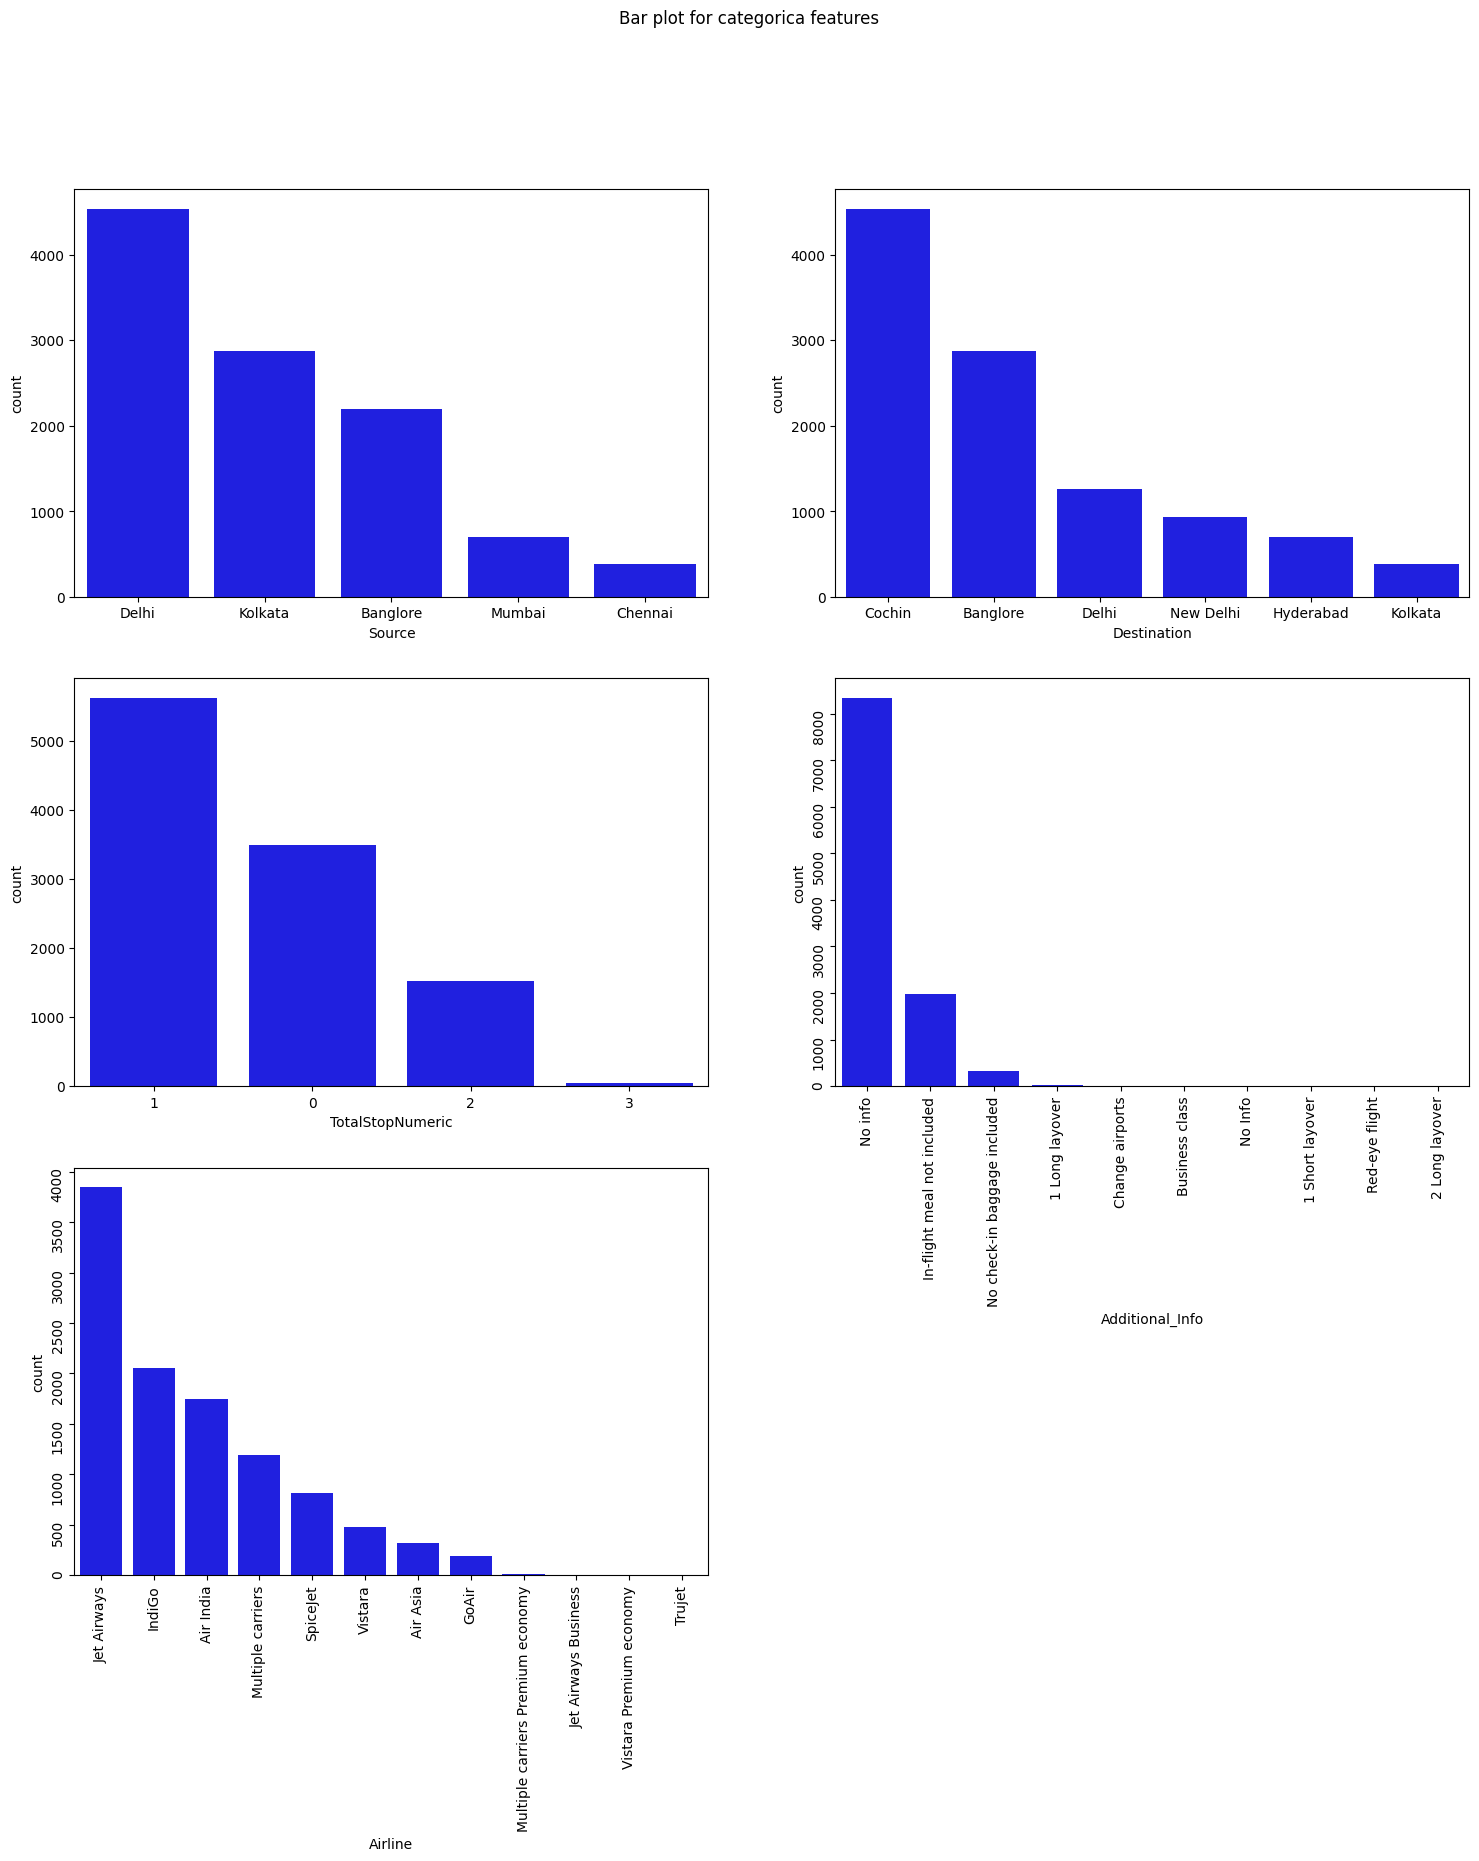

In [94]:
fig, axes=plt.subplots(3,2,figsize=(18,18))
fig.suptitle('Bar plot for categorica features')
sns.countplot(ax=axes[0,0],x='Source',data=df2,color='blue',order=df2['Source'].value_counts().index)
sns.countplot(ax=axes[0,1],x='Destination',data=df2,color='blue',order=df2['Destination'].value_counts().index)
sns.countplot(ax=axes[2,0],x='Airline',data=df2,color='blue',order=df2['Airline'].value_counts().index)
sns.countplot(ax=axes[1,1],x='Additional_Info',data=df2,color='blue',order=df2['Additional_Info'].value_counts().index)
sns.countplot(ax=axes[1,0],x='TotalStopNumeric',data=df2,color='blue',order=df2['TotalStopNumeric'].value_counts().index)
axes[2,1].axis('off')
axes[2,0].tick_params(labelrotation=90)
axes[1,1].tick_params(labelrotation=90)

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10682 non-null  object 
 1   Source             10682 non-null  object 
 2   Destination        10682 non-null  object 
 3   Route              10682 non-null  object 
 4   Additional_Info    10682 non-null  object 
 5   Price              10682 non-null  int64  
 6   DurationinMin      10682 non-null  float64
 7   TotalStopNumeric   10682 non-null  int64  
 8   Dep_Day            10682 non-null  int32  
 9   Dep_Month          10682 non-null  int32  
 10  Dep_Hour           10682 non-null  int32  
 11  Dep_min            10682 non-null  int32  
 12  Arr_Day            10682 non-null  int64  
 13  Arr_Month          10682 non-null  int64  
 14  Arr_Hour           10682 non-null  int64  
 15  Arr_minute         10682 non-null  int64  
 16  Price_log          10682 no

<Axes: xlabel='Price', ylabel='Density'>

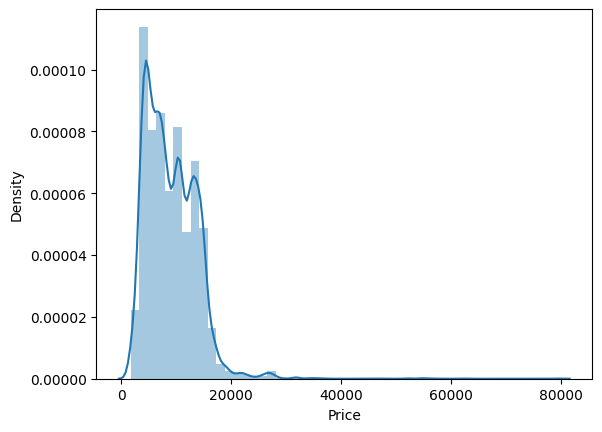

In [95]:
def log_transform(data,col):
    for i in col:
        if (data[i]==1.0).all():
            data[i + '_log']=np.log(data[i]+1)
        else:
            data[i + '_log']=np.log(data[i])
    data.info()
        
log_transform(df2,['Price','DurationinMin'])
sns.distplot(df2['Price'],axlabel="Price")

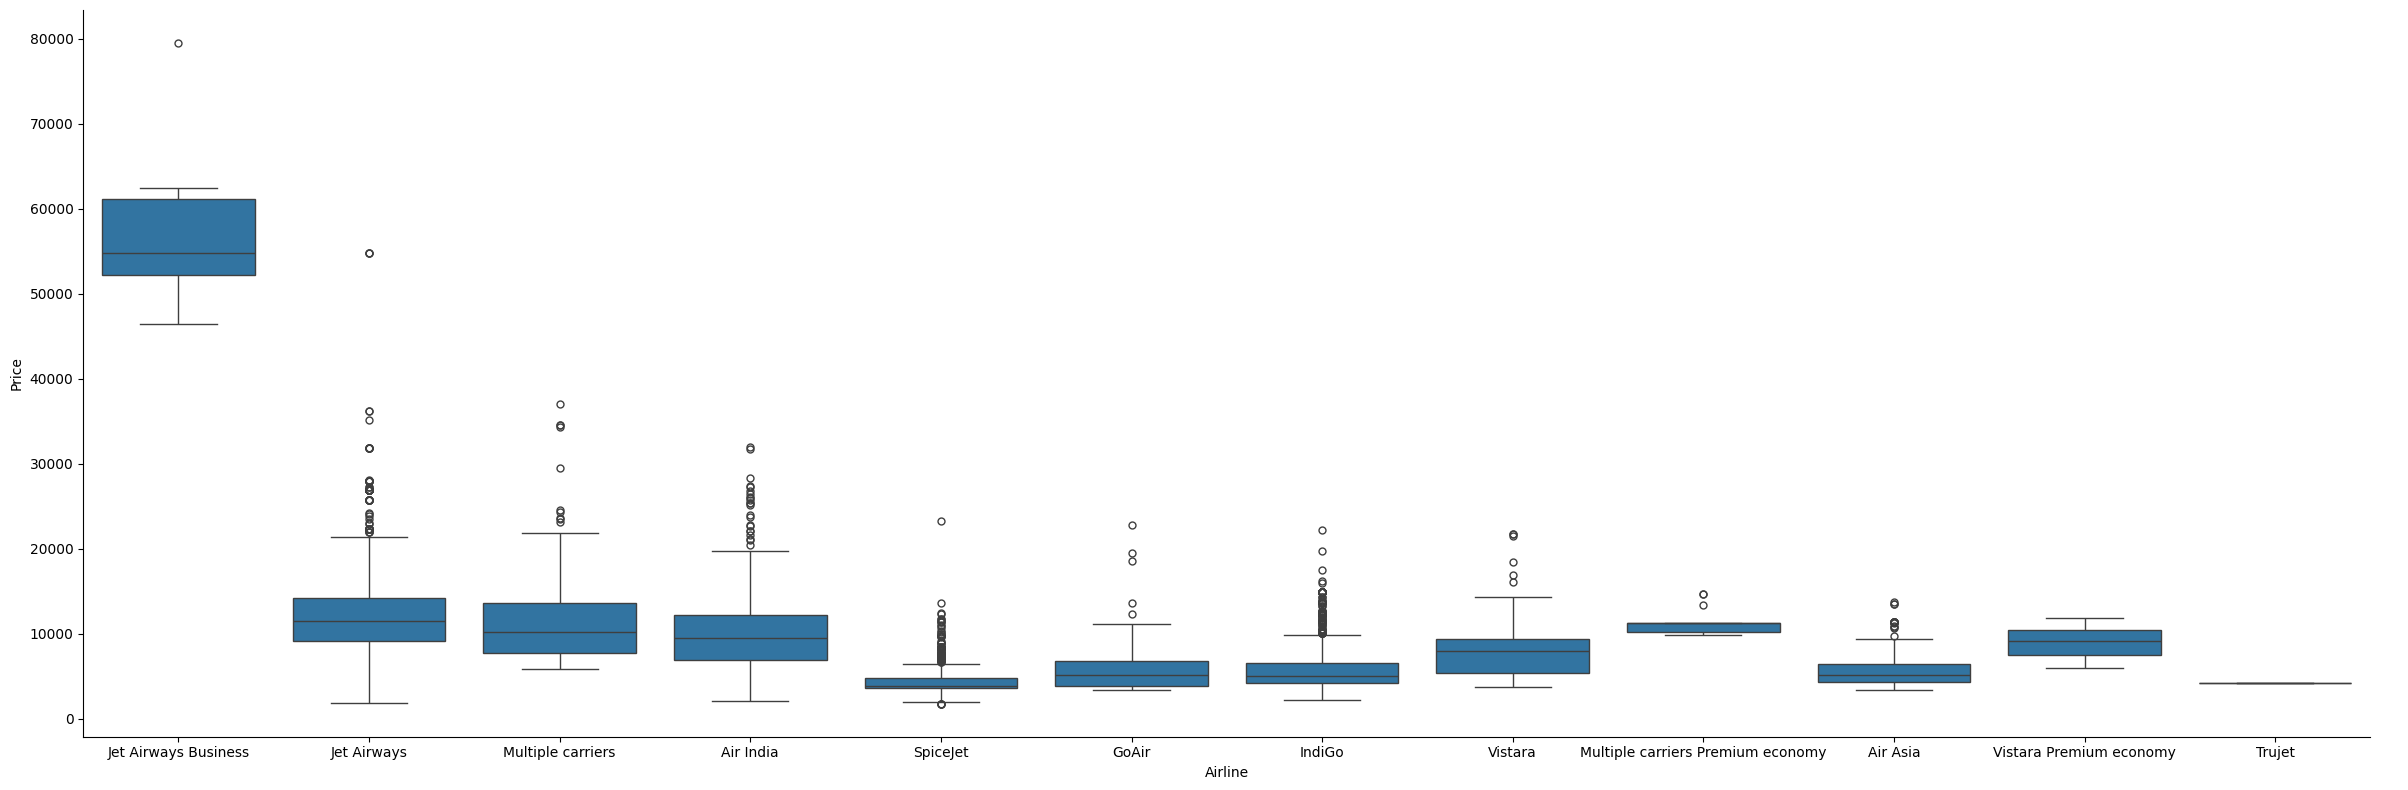

In [96]:
sns.catplot(y='Price',x='Airline',data=df2.sort_values('Price',ascending=False),kind="box",height=8,aspect=3)

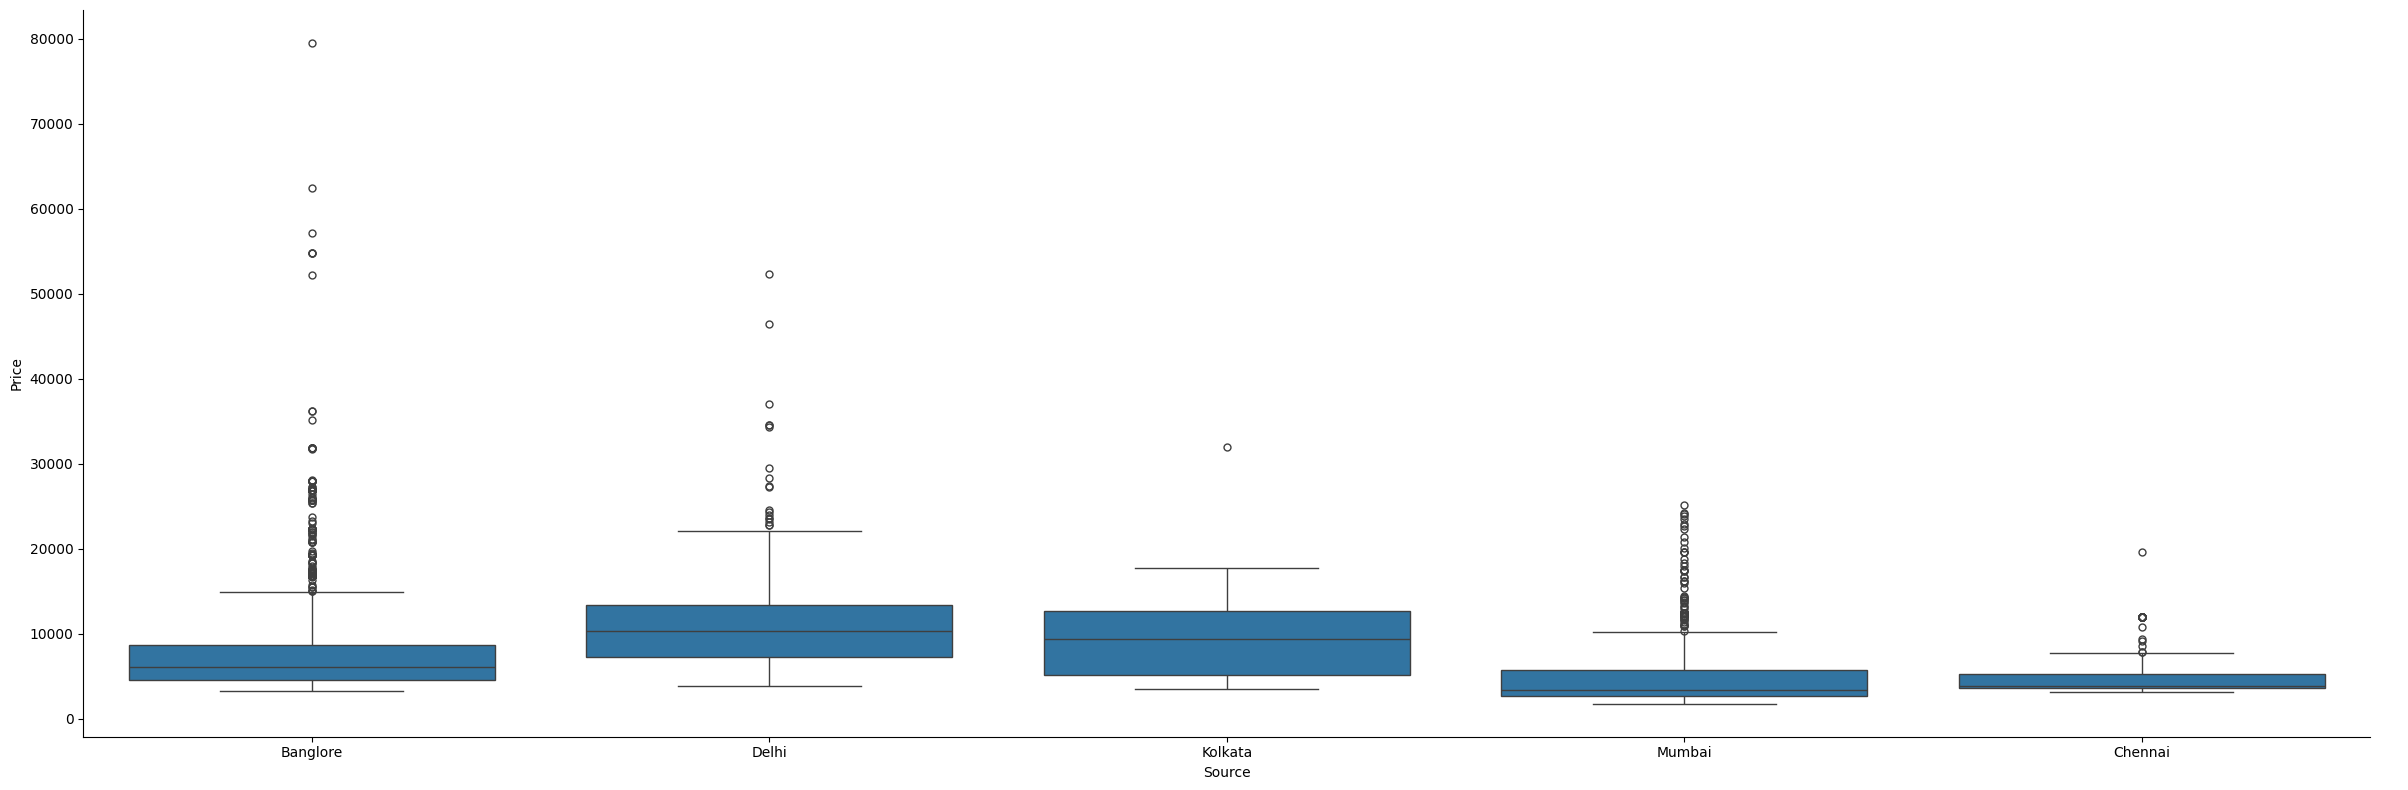

In [97]:
sns.catplot(y='Price',x='Source',data=df2.sort_values('Price',ascending=False),kind="box",height=8,aspect=3)

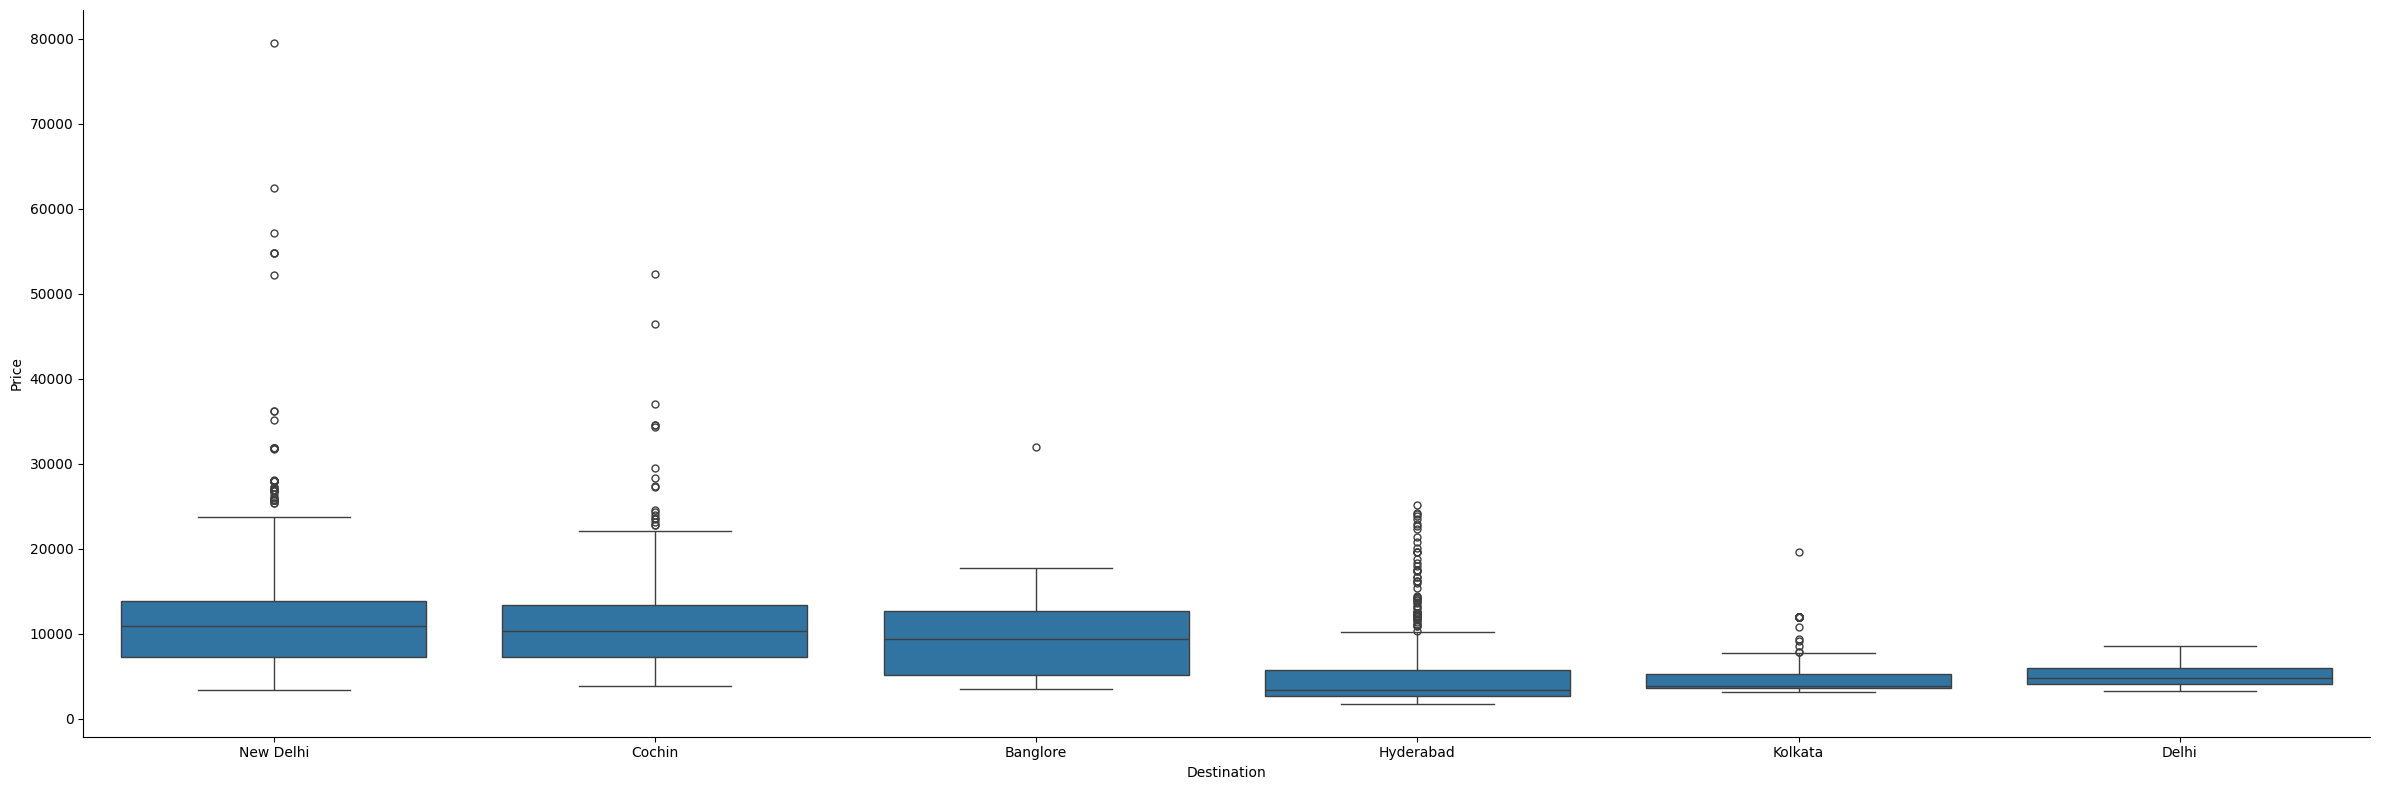

In [98]:
sns.catplot(y='Price',x='Destination',data=df2.sort_values('Price',ascending=False),kind="box",height=8,aspect=3)

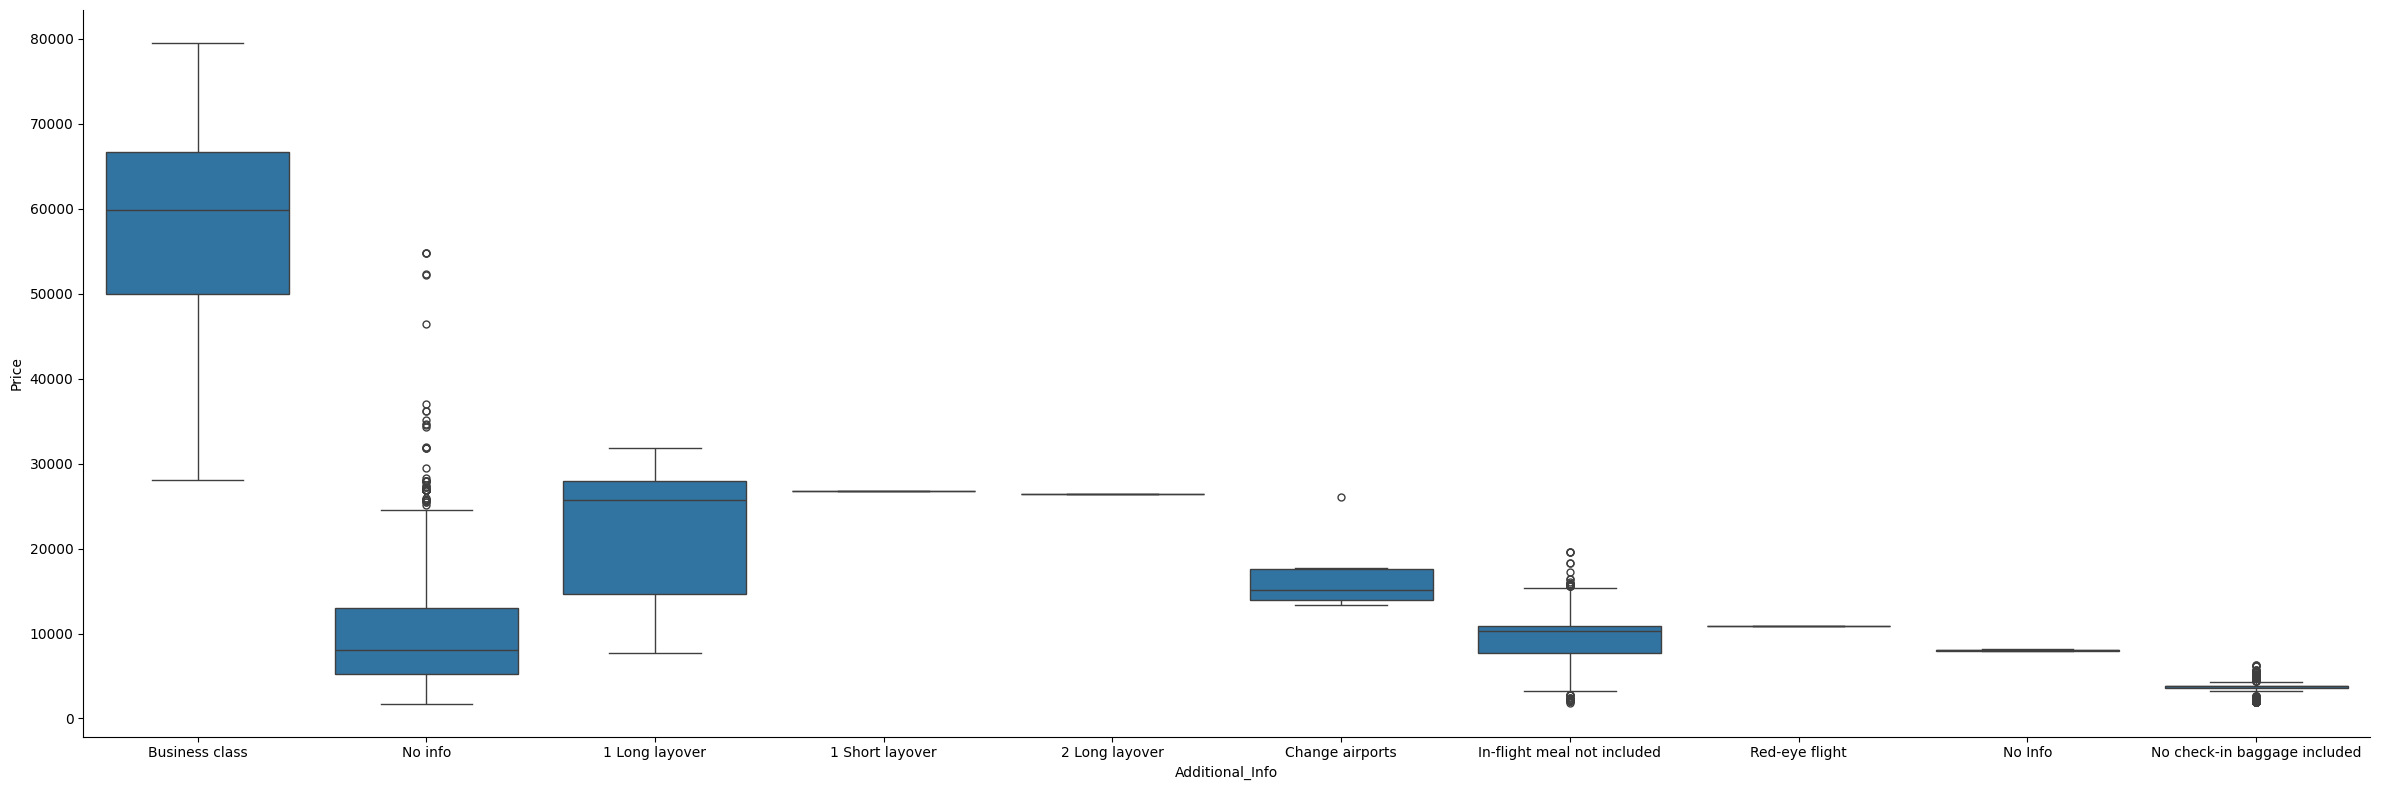

In [99]:
sns.catplot(y='Price',x='Additional_Info',data=df2.sort_values('Price',ascending=False),kind="box",height=8,aspect=3)

In [100]:
df2.head()

,Airline,Source,Destination,Route,Additional_Info,Price,DurationinMin,TotalStopNumeric,Dep_Day,Dep_Month,Dep_Hour,Dep_min,Arr_Day,Arr_Month,Arr_Hour,Arr_minute,Price_log,DurationinMin_log
0,IndiGo,Banglore,New Delhi,BLR ? DEL,No info,3897,170.0,0,24,3,22,20,22,3,1,10,8.267962,5.135798
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,No info,7662,445.0,2,1,5,5,50,1,5,13,15,8.944028,6.098074
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,No info,13882,1140.0,2,9,6,9,25,10,6,4,25,9.538348,7.038784
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,No info,6218,325.0,1,12,5,18,5,12,5,23,30,8.735204,5.783825
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,No info,13302,285.0,1,1,3,16,50,1,3,21,35,9.495670,5.652489


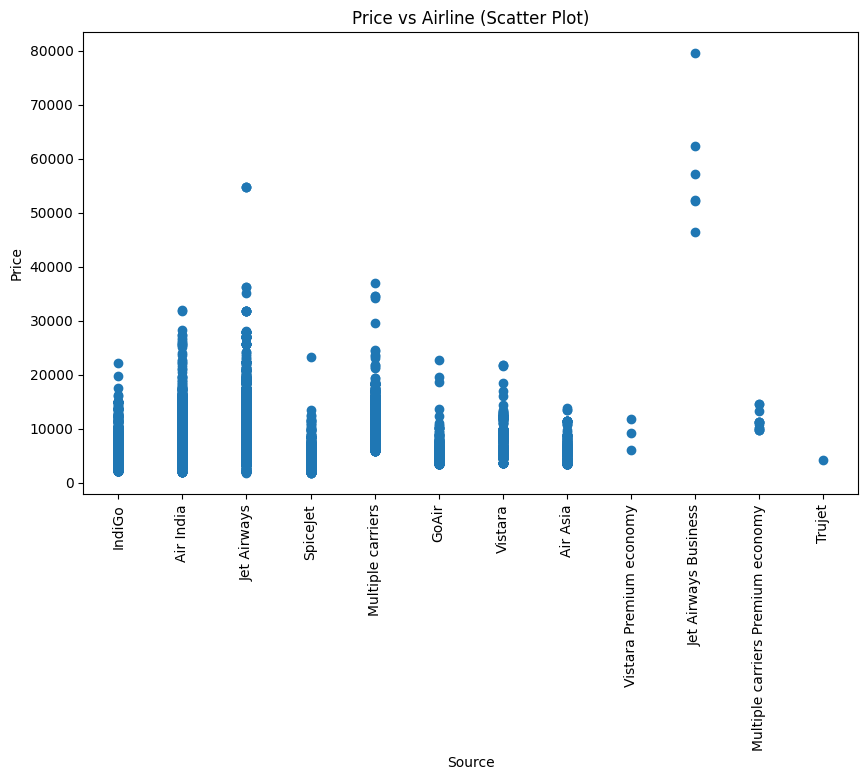

In [101]:
plt.figure(figsize=(10, 6)) 
plt.scatter(df2["Airline"], df2["Price"])
plt.xlabel("Source")
plt.ylabel("Price")
plt.title("Price vs Airline (Scatter Plot)")
plt.xticks(rotation=90)
plt.show()

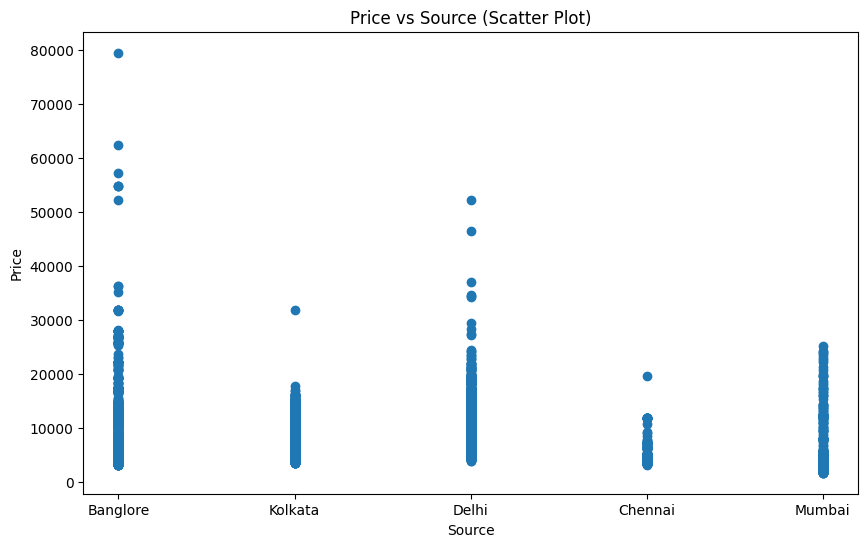

In [102]:
plt.figure(figsize=(10, 6)) 
plt.scatter(df1["Source"], df1["Price"])
plt.xlabel("Source")
plt.ylabel("Price")
plt.title("Price vs Source (Scatter Plot)")

plt.show()

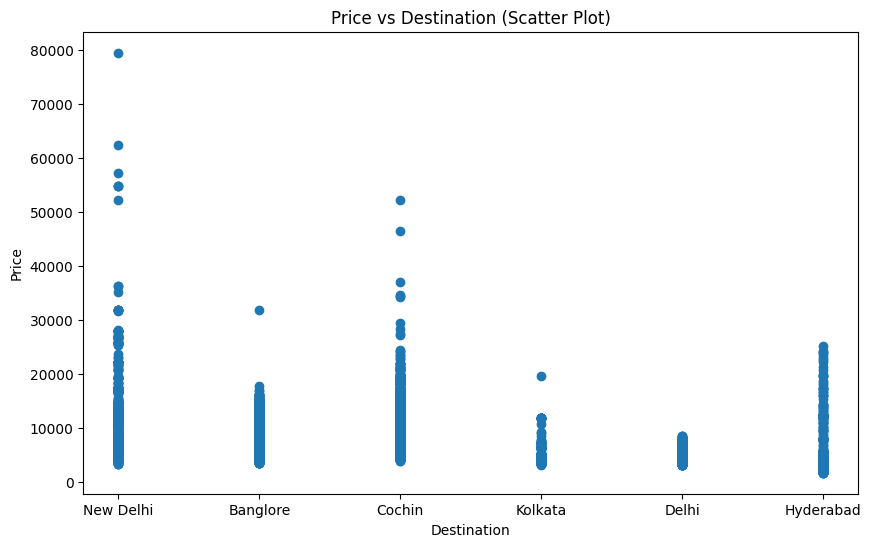

In [103]:
plt.figure(figsize=(10, 6)) 
plt.scatter(df1["Destination"], df1["Price"])
plt.xlabel("Destination")
plt.ylabel("Price")
plt.title("Price vs Destination (Scatter Plot)")
plt.show()

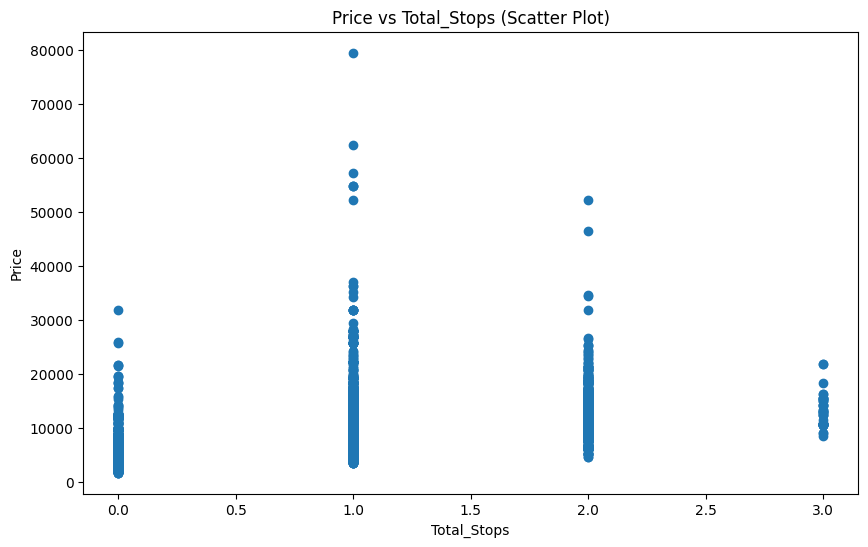

In [104]:
plt.figure(figsize=(10, 6)) 
plt.scatter(df1["TotalStopNumeric"], df1["Price"])
plt.xlabel("Total_Stops")
plt.ylabel("Price")
plt.title("Price vs Total_Stops (Scatter Plot)")
plt.show()

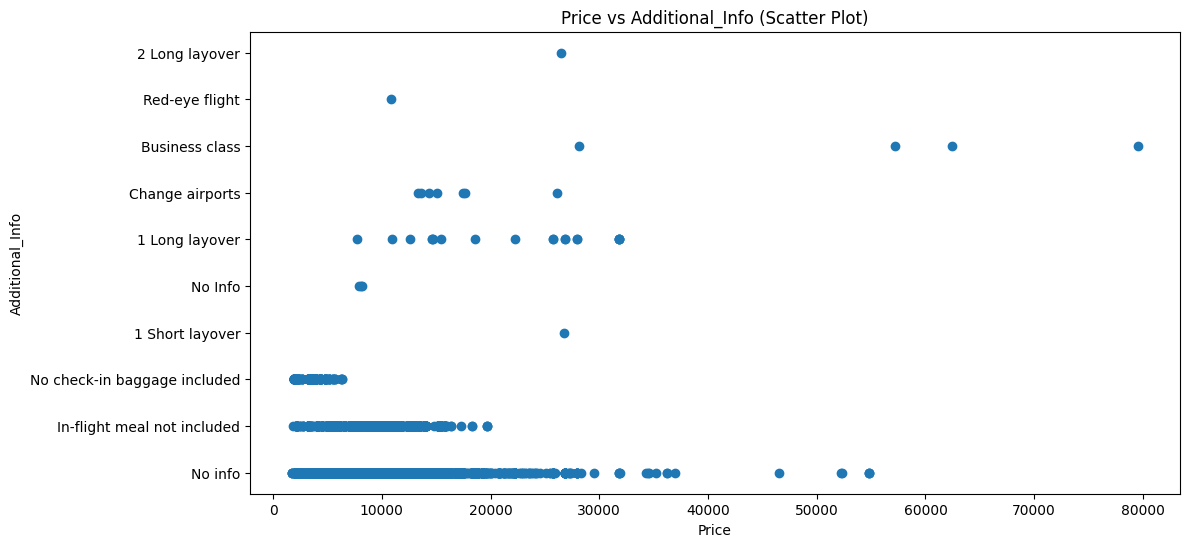

In [105]:

plt.figure(figsize=(12, 6)) 
plt.scatter( df1["Price"],df1["Additional_Info"])
plt.ylabel("Additional_Info")
plt.xlabel("Price")
plt.title("Price vs Additional_Info (Scatter Plot)")
plt.show()

In [106]:
df2.columns.tolist()


['Airline',
 'Source',
 'Destination',
 'Route',
 'Additional_Info',
 'Price',
 'DurationinMin',
 'TotalStopNumeric',
 'Dep_Day',
 'Dep_Month',
 'Dep_Hour',
 'Dep_min',
 'Arr_Day',
 'Arr_Month',
 'Arr_Hour',
 'Arr_minute',
 'Price_log',
 'DurationinMin_log']

In [107]:
Num_columns=['Price',
 'DurationinMin',
 'TotalStopNumeric',
 'Dep_Day',
 'Dep_Month',
 'Dep_Hour',
 'Dep_min',
 'Arr_Day',
 'Arr_Month',
 'Arr_Hour',
 'Arr_minute']

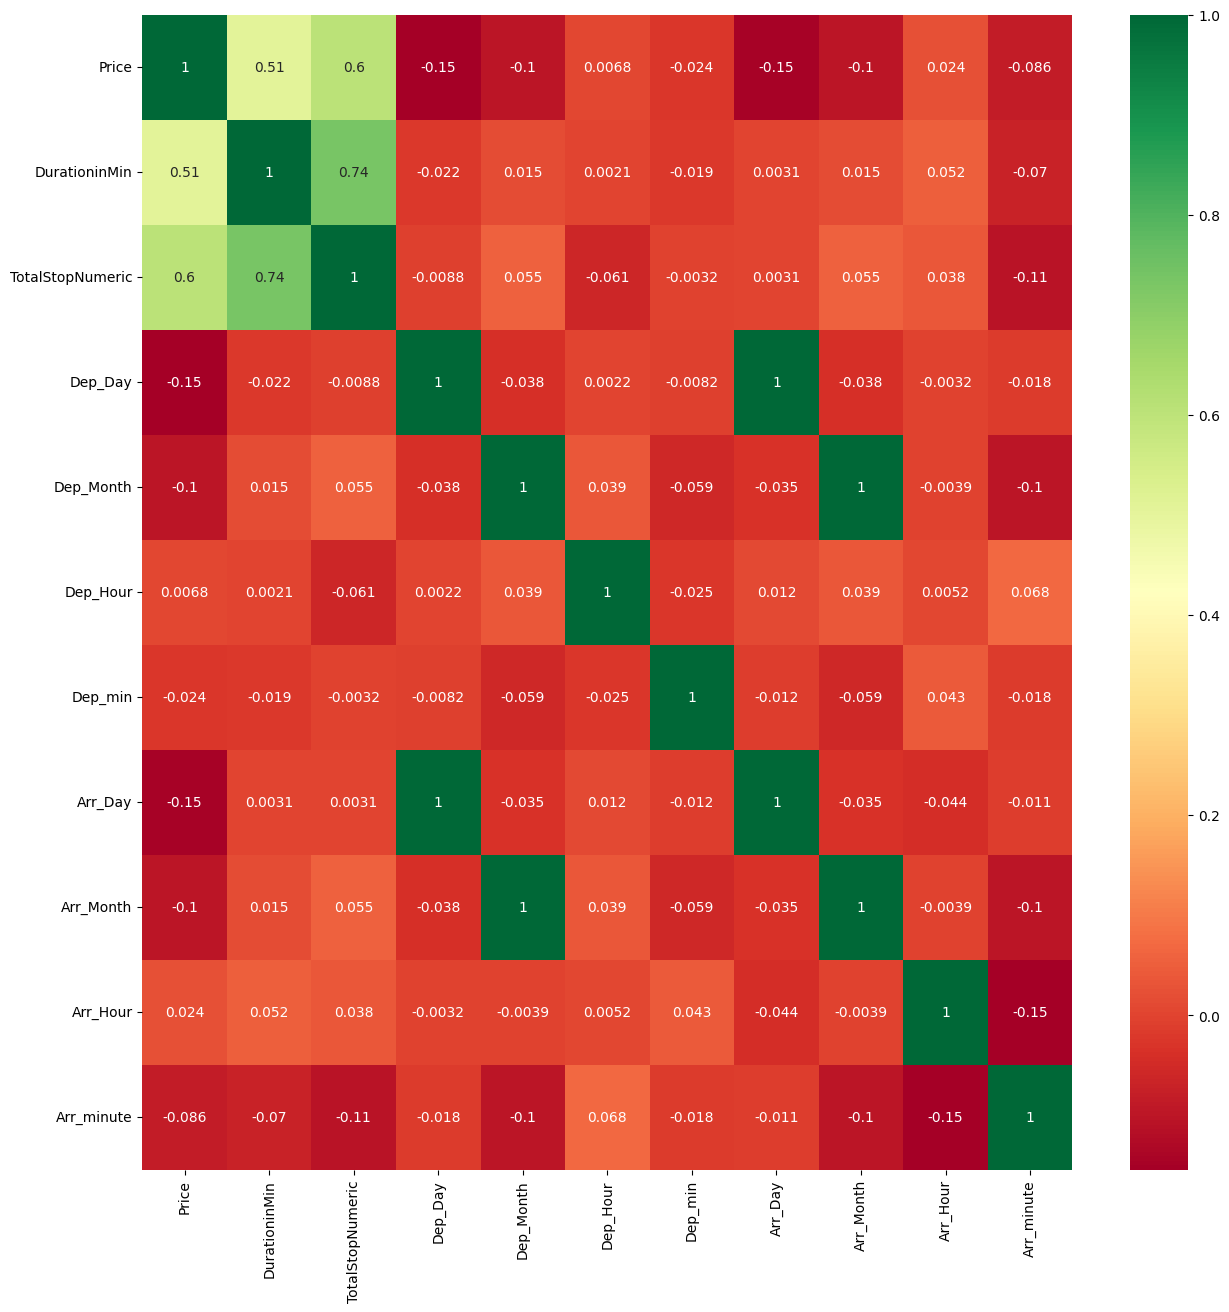

In [108]:

plt.figure(figsize=(15,15))
sns.heatmap(df2[Num_columns].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [109]:
df3=df2
df3

,Airline,Source,Destination,Route,Additional_Info,Price,DurationinMin,TotalStopNumeric,Dep_Day,Dep_Month,Dep_Hour,Dep_min,Arr_Day,Arr_Month,Arr_Hour,Arr_minute,Price_log,DurationinMin_log
0,IndiGo,Banglore,New Delhi,BLR ? DEL,No info,3897,170.0,0,24,3,22,20,22,3,1,10,8.267962,5.135798
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,No info,7662,445.0,2,1,5,5,50,1,5,13,15,8.944028,6.098074
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,No info,13882,1140.0,2,9,6,9,25,10,6,4,25,9.538348,7.038784
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,No info,6218,325.0,1,12,5,18,5,12,5,23,30,8.735204,5.783825
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,No info,13302,285.0,1,1,3,16,50,1,3,21,35,9.495670,5.652489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,No info,4107,150.0,0,9,4,19,55,9,4,22,25,8.320448,5.010635
10679,Air India,Kolkata,Banglore,CCU ? BLR,No info,4145,155.0,0,27,4,20,45,27,4,23,20,8.329658,5.043425
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,No info,7229,180.0,0,27,4,8,20,28,4,11,20,8.885856,5.192957
10681,Vistara,Banglore,New Delhi,BLR ? DEL,No info,12648,160.0,0,1,3,11,30,1,3,14,10,9.445254,5.075174


In [110]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10682 non-null  object 
 1   Source             10682 non-null  object 
 2   Destination        10682 non-null  object 
 3   Route              10682 non-null  object 
 4   Additional_Info    10682 non-null  object 
 5   Price              10682 non-null  int64  
 6   DurationinMin      10682 non-null  float64
 7   TotalStopNumeric   10682 non-null  int64  
 8   Dep_Day            10682 non-null  int32  
 9   Dep_Month          10682 non-null  int32  
 10  Dep_Hour           10682 non-null  int32  
 11  Dep_min            10682 non-null  int32  
 12  Arr_Day            10682 non-null  int64  
 13  Arr_Month          10682 non-null  int64  
 14  Arr_Hour           10682 non-null  int64  
 15  Arr_minute         10682 non-null  int64  
 16  Price_log          10682 no

In [111]:
df3.isnull().sum()

Airline              0
Source               0
Destination          0
Route                0
Additional_Info      0
Price                0
DurationinMin        0
TotalStopNumeric     0
Dep_Day              0
Dep_Month            0
Dep_Hour             0
Dep_min              0
Arr_Day              0
Arr_Month            0
Arr_Hour             0
Arr_minute           0
Price_log            0
DurationinMin_log    0
dtype: int64

In [112]:
df3_categorical=df3.select_dtypes(exclude=['int64','int32','float64'])
df3_numerical=df3.select_dtypes(include=['int64','int32','float64'])


In [113]:
df3_categorical

,Airline,Source,Destination,Route,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR ? DEL,No info
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,No info
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,No info
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,No info
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,No info
...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,No info
10679,Air India,Kolkata,Banglore,CCU ? BLR,No info
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,No info
10681,Vistara,Banglore,New Delhi,BLR ? DEL,No info


In [114]:
df3_numerical

,Price,DurationinMin,TotalStopNumeric,Dep_Day,Dep_Month,Dep_Hour,Dep_min,Arr_Day,Arr_Month,Arr_Hour,Arr_minute,Price_log,DurationinMin_log
0,3897,170.0,0,24,3,22,20,22,3,1,10,8.267962,5.135798
1,7662,445.0,2,1,5,5,50,1,5,13,15,8.944028,6.098074
2,13882,1140.0,2,9,6,9,25,10,6,4,25,9.538348,7.038784
3,6218,325.0,1,12,5,18,5,12,5,23,30,8.735204,5.783825
4,13302,285.0,1,1,3,16,50,1,3,21,35,9.495670,5.652489
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,150.0,0,9,4,19,55,9,4,22,25,8.320448,5.010635
10679,4145,155.0,0,27,4,20,45,27,4,23,20,8.329658,5.043425
10680,7229,180.0,0,27,4,8,20,28,4,11,20,8.885856,5.192957
10681,12648,160.0,0,1,3,11,30,1,3,14,10,9.445254,5.075174


In [115]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df3_categorical=df3_categorical.apply(le.fit_transform)
df3_categorical.head()

,Airline,Source,Destination,Route,Additional_Info
0,3,0,5,18,8
1,1,3,0,84,8
2,4,2,1,118,8
3,3,3,0,91,8
4,3,0,5,29,8


In [116]:
df4=pd.concat([df3_numerical,df3_categorical],axis=1)
df4.head()

,Price,DurationinMin,TotalStopNumeric,Dep_Day,Dep_Month,Dep_Hour,Dep_min,Arr_Day,Arr_Month,Arr_Hour,Arr_minute,Price_log,DurationinMin_log,Airline,Source,Destination,Route,Additional_Info
0,3897,170.0,0,24,3,22,20,22,3,1,10,8.267962,5.135798,3,0,5,18,8
1,7662,445.0,2,1,5,5,50,1,5,13,15,8.944028,6.098074,1,3,0,84,8
2,13882,1140.0,2,9,6,9,25,10,6,4,25,9.538348,7.038784,4,2,1,118,8
3,6218,325.0,1,12,5,18,5,12,5,23,30,8.735204,5.783825,3,3,0,91,8
4,13302,285.0,1,1,3,16,50,1,3,21,35,9.495670,5.652489,3,0,5,29,8


In [117]:
from sklearn.model_selection import train_test_split


X = df4.drop('Price', axis=1)
y = df4['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [118]:
X.head()

,DurationinMin,TotalStopNumeric,Dep_Day,Dep_Month,Dep_Hour,Dep_min,Arr_Day,Arr_Month,Arr_Hour,Arr_minute,Price_log,DurationinMin_log,Airline,Source,Destination,Route,Additional_Info
0,170.0,0,24,3,22,20,22,3,1,10,8.267962,5.135798,3,0,5,18,8
1,445.0,2,1,5,5,50,1,5,13,15,8.944028,6.098074,1,3,0,84,8
2,1140.0,2,9,6,9,25,10,6,4,25,9.538348,7.038784,4,2,1,118,8
3,325.0,1,12,5,18,5,12,5,23,30,8.735204,5.783825,3,3,0,91,8
4,285.0,1,1,3,16,50,1,3,21,35,9.495670,5.652489,3,0,5,29,8


In [119]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [120]:
print(f"Size of X_train: {X_train.shape}")
print(f"Size of X_test: {X_test.shape}")
print(f"Size of y_train: {y_train.shape}")
print(f"Size of y_test: {y_test.shape}")


Size of X_train: (8545, 17)
Size of X_test: (2137, 17)
Size of y_train: (8545,)
Size of y_test: (2137,)


In [132]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
# Assuming df is your DataFrame and 'price' is your target column
X = df4.drop('Price', axis=1)
y = df4['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost Regression': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf'),
    'Neural Network': Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(1)
    ])
}

results = {}

for name, model in models.items():
    if name == 'Neural Network':
        model.compile(optimizer='adam', loss='mean_squared_error')
        history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0, validation_split=0.2)
        y_pred = model.predict(X_test).flatten()
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Store results
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape}

# Display results
for name, metrics in results.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print()

# Find the best model based on MAPE
best_model_name = min(results, key=lambda x: results[x]['MAPE'])
best_model_metrics = results[best_model_name]

print(f"Best Model: {best_model_name}")
for metric_name, value in best_model_metrics.items():
    print(f"{metric_name}: {value:.4f}")


67/67 [==============================] - 0s 1ms/step
Linear Regression:
  MAE: 783.2090
  MSE: 1915705.0383
  RMSE: 1384.0900
  MAPE: 12.6833

Ridge Regression:
  MAE: 783.0090
  MSE: 1915441.6495
  RMSE: 1383.9948
  MAPE: 12.6661

Lasso Regression:
  MAE: 783.1596
  MSE: 1915729.7139
  RMSE: 1384.0989
  MAPE: 12.6753

Decision Tree Regression:
  MAE: 5.0987
  MSE: 12553.3374
  RMSE: 112.0417
  MAPE: 0.0226

Random Forest Regression:
  MAE: 4.6844
  MSE: 11194.5630
  RMSE: 105.8044
  MAPE: 0.0219

XGBoost Regression:
  MAE: 62.1597
  MSE: 418748.7924
  RMSE: 647.1080
  MAPE: 0.3509

Support Vector Regression:
  MAE: 3081.2626
  MSE: 18193187.4747
  RMSE: 4265.3473
  MAPE: 40.4657

Neural Network:
  MAE: 2010.1344
  MSE: 8266041.3015
  RMSE: 2875.0724
  MAPE: 23.7435

Best Model: Random Forest Regression
MAE: 4.6844
MSE: 11194.5630
RMSE: 105.8044
MAPE: 0.0219


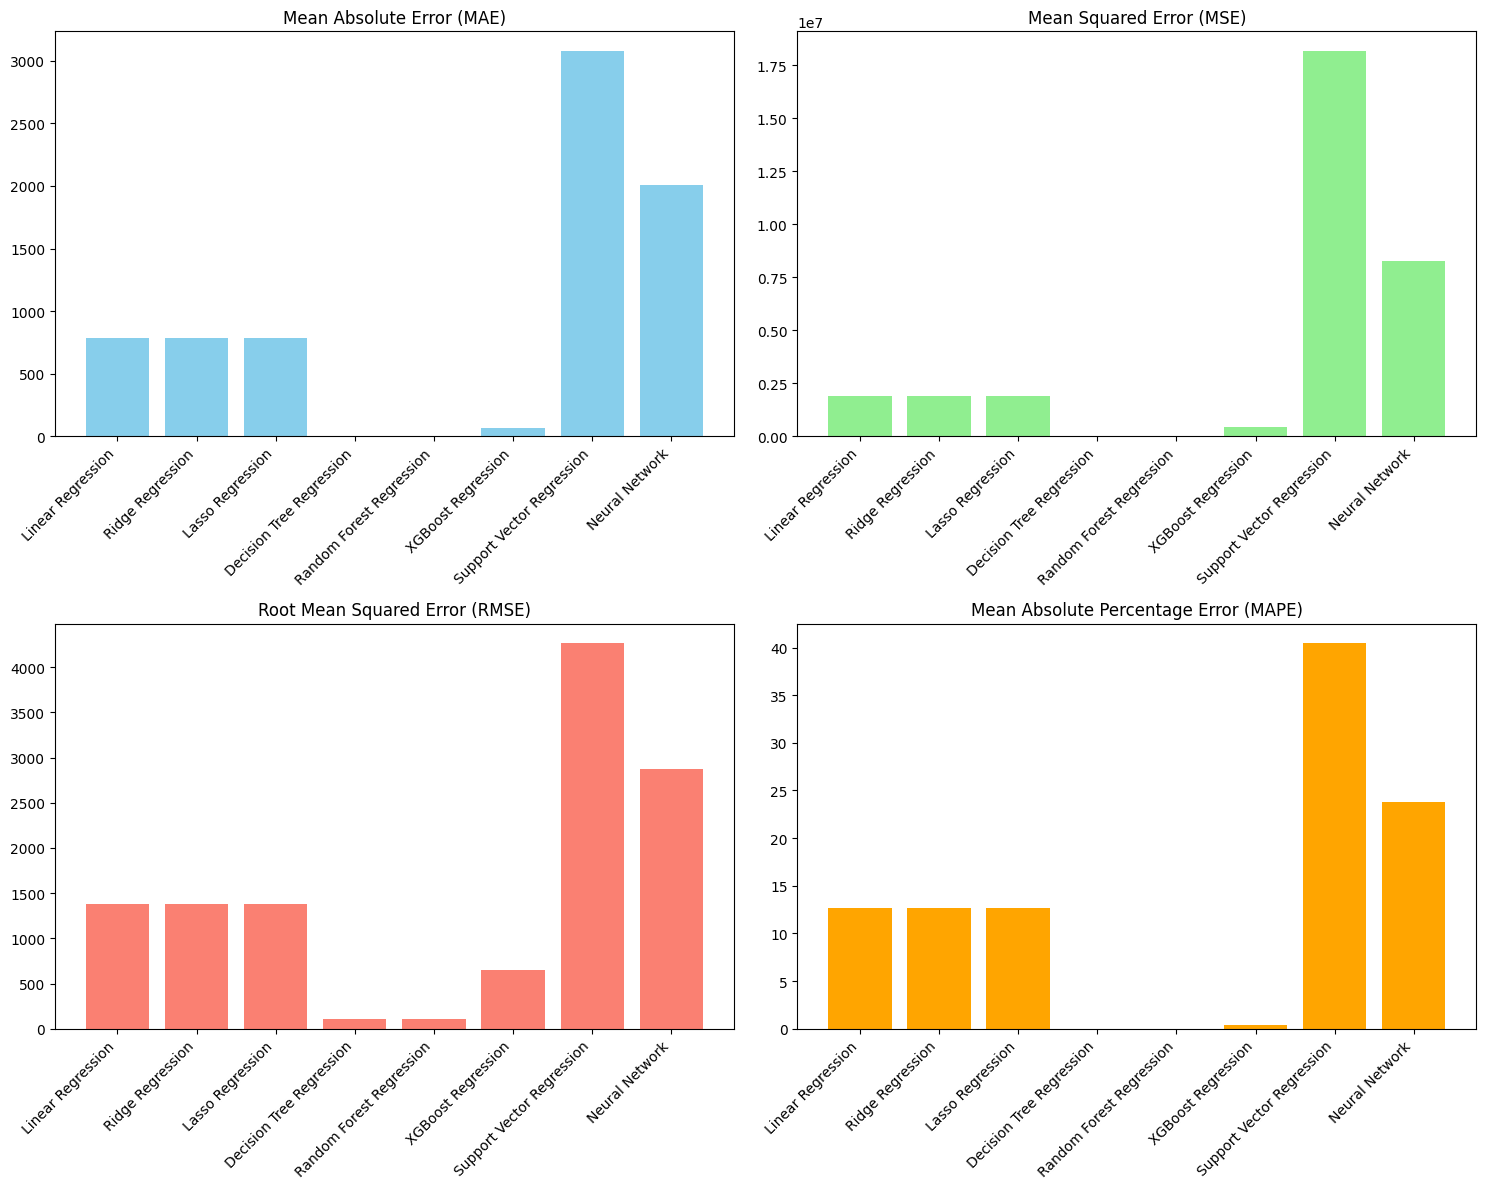

In [133]:
metric_names = ['MAE', 'MSE', 'RMSE', 'MAPE']
metric_values = {metric: [results[model][metric] for model in models.keys()] for metric in metric_names}

fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs[0, 0].bar(models.keys(), metric_values['MAE'], color='skyblue')
axs[0, 0].set_title('Mean Absolute Error (MAE)')
axs[0, 0].set_xticklabels(models.keys(), rotation=45, ha='right')

axs[0, 1].bar(models.keys(), metric_values['MSE'], color='lightgreen')
axs[0, 1].set_title('Mean Squared Error (MSE)')
axs[0, 1].set_xticklabels(models.keys(), rotation=45, ha='right')

axs[1, 0].bar(models.keys(), metric_values['RMSE'], color='salmon')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_xticklabels(models.keys(), rotation=45, ha='right')

axs[1, 1].bar(models.keys(), metric_values['MAPE'], color='orange')
axs[1, 1].set_title('Mean Absolute Percentage Error (MAPE)')
axs[1, 1].set_xticklabels(models.keys(), rotation=45, ha='right')

plt.tight_layout()
plt.show()